# Santander data analysis

### Moduły

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Ustawienia podstawowe

In [2]:
#pd.options.mode.use_inf_as_na = True
#pd.set_option('precision', 2)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
%matplotlib inline

# Location variables
DIR = '.'
FILE_NAME = 'train_ver2'
EXTENSION = '.csv'

# Lokalizacja, gdzie mają zostać zapisane wygenerowane wykresy
IMG_PATH = os.path.join(DIR, "Drawings")

# Funkcja służąca do zapisu wykresów do pliku
def save_plot(plot_id, extension="jpg", resolution=300):
    os.makedirs(IMG_PATH, exist_ok=True)
    plot_path = os.path.join(IMG_PATH, plot_id + "." + extension)
    plt.savefig(plot_path, format=extension, dpi=resolution)

### Podział danych
Oryginalny plik z danymi do analizy waży ponad 2GB. Z uwagi na ograniczone możliwości mojej maszyny przy próbie wczytania go pojawia się błąd 'Memory Error', dlatego zdecydowałem się podzielić go na mniejsze części a następnie połączyć kilka z nich w jeden DataFrame.

In [3]:
#chunk_size = 200000
#chunk_no = 1
#path = os.path.join(DIR, FILE_NAME + EXTENSION)

#for chunk in pd.read_csv(PATH, chunksize=chunk_size):
#    chunk.to_csv(FILE_NAME + '_' + str(chunk_no) + EXTENSION, index=False)
#    chunk_no += 1

Każdy plik zawiera 200,000 wierszy.

### Ładowanie danych
Zdecydowałem się przeprowadzić analizę na 1 000 000 wierszy dla wybranych kolumn.

In [4]:
missing_values = [' NA', '     NA']
columns = ['ncodpers', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 
           'indresi', 'indext', 'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
           'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 
           'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 
           'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
           'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
           'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

# Pierwszy plik3
path = os.path.join(DIR, FILE_NAME + '_1' + EXTENSION)
data = pd.read_csv(path, low_memory=False, usecols=columns, na_values=missing_values)

# Łączenie 5 plików CSV w jeden DataFrame
n = 2
m = 5

for i in range(n, m+1):
    path = os.path.join(DIR, FILE_NAME + '_{}'.format(i) + EXTENSION)
    data_to_add = pd.read_csv(path, low_memory=False, usecols=columns)
    data = pd.concat(objs=[data, data_to_add], ignore_index=True)

print('DataFrame zawiera {} wierszy.'.format(len(data)))

data.head(3)

DataFrame zawiera 1000000 wierszy.


,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indresi,indext,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1375586,N,ES,H,35,2015-01-12,0.0,6,S,N,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1050611,N,ES,V,23,2012-08-10,0.0,35,S,S,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,1050612,N,ES,V,23,2012-08-10,0.0,35,S,N,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


### Modyfikacja, czyszczenie danych

In [5]:
# Zmiana hiszpańskich nazw kolumn na angielskie
col_names = list(data.columns)
eng_col_names = ['cust_id', 'emp_status', 'cust_country', 'cust_gender', 'age', 'join_date', 'is_new_cust', 'cust_since_mths', 
                 'resid_country', 'is_foreigner', 'cust_province_name', 'cust_activity_status', 'gross_hshold_income', 
                 'cust_segment', 'savings_acc', 'guarantees', 'curr_accts', 'derivative_acc', 'payroll_acc', 'junior_acc', 
                 'more_particular_acc', 'particular_acc', 'particular_plus_acc', 'short_term_deposits', 'mid_term_deposits',
                 'long_term_deposits', 'e-acc', 'funds', 'mortgage', 'pensions_1', 'loans', 'taxes', 'credit_card', 
                 'securities', 'home_acc', 'payroll', 'pensions_2', 'direct_debit']

length = len(eng_col_names)
new_col_names = {}

for i in range(length):
    new_col_names[col_names[i]] = eng_col_names[i]

data.rename(columns=new_col_names, inplace=True)

In [6]:
# Czyszczenie danych
income_median = data['gross_hshold_income'].median()
replace_nan = {'gross_hshold_income': income_median, 'payroll': 0, 'pensions_2': 0}
data.fillna(value = replace_nan, inplace=True)

In [7]:
#Zmiana typów danych dla poszczególnych kolumn
col_names = list(data.columns)

numeric_cols = ['age', 'cust_since_mths']
date_cols = ['join_date']
categorical_cols = ['emp_status', 'cust_gender', 'is_new_cust', 'is_foreigner', 'cust_activity_status', 'cust_segment']
categorical_cols.extend(col_names[14:])

for col in col_names:
    if col in numeric_cols:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    elif col in date_cols:
        data[col] = pd.to_datetime(data[col], errors='coerce')
    elif col in categorical_cols:
        data[col] = data[col].astype('category', errors='ignore')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 38 columns):
cust_id                 1000000 non-null int64
emp_status              989218 non-null category
cust_country            989218 non-null object
cust_gender             989214 non-null category
age                     989218 non-null float64
join_date               989218 non-null datetime64[ns]
is_new_cust             989218 non-null category
cust_since_mths         989218 non-null float64
resid_country           989218 non-null object
is_foreigner            989218 non-null category
cust_province_name      982266 non-null object
cust_activity_status    989218 non-null category
gross_hshold_income     1000000 non-null float64
cust_segment            989105 non-null category
savings_acc             1000000 non-null category
guarantees              1000000 non-null category
curr_accts              1000000 non-null category
derivative_acc          1000000 non-null category
payrol

In [9]:
data

,cust_id,emp_status,cust_country,cust_gender,age,join_date,is_new_cust,cust_since_mths,resid_country,is_foreigner,cust_province_name,cust_activity_status,gross_hshold_income,cust_segment,savings_acc,guarantees,curr_accts,derivative_acc,payroll_acc,junior_acc,more_particular_acc,particular_acc,particular_plus_acc,short_term_deposits,mid_term_deposits,long_term_deposits,e-acc,funds,mortgage,pensions_1,loans,taxes,credit_card,securities,home_acc,payroll,pensions_2,direct_debit
0,1375586,N,ES,H,35.0,2015-01-12,0.0,6.0,S,N,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1050611,N,ES,V,23.0,2012-08-10,0.0,35.0,S,S,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,1050612,N,ES,V,23.0,2012-08-10,0.0,35.0,S,N,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,1050613,N,ES,H,22.0,2012-08-10,0.0,35.0,S,N,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,1050614,N,ES,V,23.0,2012-08-10,0.0,35.0,S,N,ZARAGOZA,1.0,106651.86,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1183296,N,ES,H,27.0,2013-09-25,0.0,22.0,S,N,MADRID,1.0,55516.98,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
999996,1183295,N,ES,H,56.0,2013-09-25,0.0,22.0,S,N,"CORUÑA, A",1.0,75654.84,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
999997,1183294,N,ES,V,39.0,2013-09-25,0.0,22.0,S,N,"CORUÑA, A",1.0,80634.87,02 - PARTICULARES,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
999998,1183293,N,ES,V,36.0,2013-09-25,0.0,22.0,S,S,MADRID,1.0,57818.46,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1


### Analiza

#### Wiek klientów

In [10]:
df = data.copy()
df['age'].dropna(inplace=True)

In [11]:
#df['age'].isnull().sum()

In [12]:
age_tot = df['age'].value_counts().reset_index().rename(columns={'index':'age', 'age':'total'})

In [48]:
# PLOTLY
fig = px.bar(data_frame=age_tot, x='age', y='total', color='total', color_continuous_scale='Bluered')
fig.update_layout(title_text='Customer\'s age', width=950, height=500)
fig.update_xaxes(title_text='Age', tickfont=dict(size=12), linewidth=1, linecolor='black')
fig.update_yaxes(title_text='Number of customers', tickfont=dict(size=12), linewidth=1, linecolor='black')
fig.show()

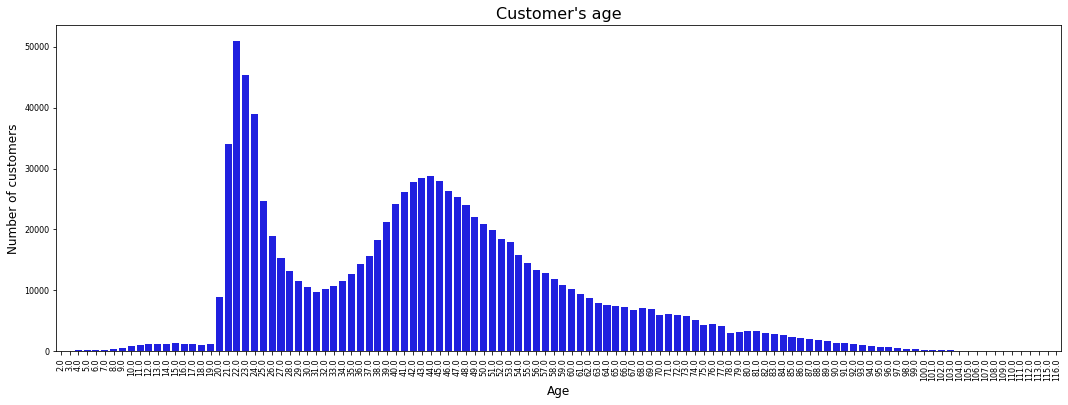

In [71]:
# SEABORN
plt.figure(figsize=(18,6))
sns.barplot(age_tot['age'], age_tot['total'], color='blue')
plt.xlabel('Age', size=12)
plt.ylabel('Number of customers', size=12)
plt.xticks(size=8, rotation='vertical')
plt.yticks(size=8)
plt.title('Customer\'s age', size=16)
plt.show()

#### Komentarz:
Z wykresu wynika...